In [ ]:
pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
accelerate                       0.32.1
aiohttp                          3.9.5
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.7.0
anyio                            3.7.1
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array_record                     0.5.1
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.1.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.15.0
backcall                         0.2.0
beautifulsoup4                   4.12.3

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
dataframe=pd.read_csv('/content/drive/MyDrive/MLdataset/air_quality_hourly_data_Colombo_METDept.csv')

Explore data set

In [3]:
dataframe.head()

,Unnamed: 0,Time,CO2
0,0,2022-12-21 00:00:00,562
1,1,2022-12-21 01:00:00,511
2,2,2022-12-21 02:00:00,511
3,3,2022-12-21 03:00:00,507
4,4,2022-12-21 04:00:00,498


In [4]:
dataframe.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
dataframe.shape

(5943, 2)

In [6]:
print("MIssing value count")
dataframe.isnull().sum()

MIssing value count


,0
Time,0
CO2,212


What are data types

In [7]:
dataframe.dtypes

,0
Time,object
CO2,object


Object can be a collection of data types.One column must have unique value (time),other column may not have unique values(CO2).Time series data cannot be duplictaed.

Number of unique values in each column in the dataframe

In [8]:
print("Unique values per column")
dataframe.nunique()

Unique values per column


,0
Time,5943
CO2,238


Data Cleaning


In [9]:
print(dataframe.isnull().sum())

Time      0
CO2     212
dtype: int64


Preprocessing/Cleaning data

In [10]:
#Removing missing values
dataframe_cleaned=dataframe.copy()
dataframe_cleaned=dataframe_cleaned.dropna()

In [11]:
print("Missing value count in cleaned dataframe")
print(dataframe_cleaned.isnull().sum())

Missing value count in cleaned dataframe
Time    0
CO2     0
dtype: int64


Converting data to the correct data type

In [12]:
dataframe_cleaned['CO2']= pd.to_numeric(dataframe_cleaned['CO2'],errors='coerce')

In [13]:
dataframe_cleaned['Time']= pd.to_datetime(dataframe_cleaned['Time'],format='mixed',errors='coerce')

More missing value

In [14]:
print(dataframe_cleaned.isnull().sum())

Time       0
CO2     2648
dtype: int64


In [15]:
dataframe_cleaned.dropna(inplace=True)

In [16]:
print(dataframe_cleaned.isnull().sum())

Time    0
CO2     0
dtype: int64


In [17]:
print("Data after cleaning:",dataframe_cleaned.shape)

Data after cleaning: (3083, 2)


Data Visualization

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

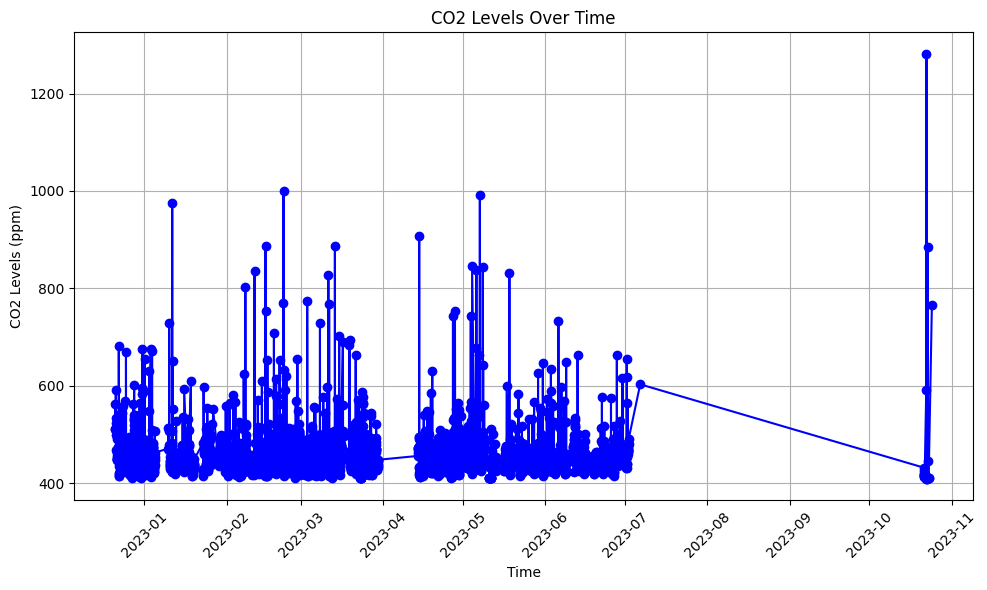

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(dataframe_cleaned['Time'], dataframe_cleaned['CO2'], marker='o', linestyle='-', color='b')

# Adding titles and labels
plt.title('CO2 Levels Over Time')
plt.xlabel('Time')
plt.ylabel('CO2 Levels (ppm)')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Display grid for better readability
plt.grid(True)

# Show the plot
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlap
plt.show()

How to fix this

In [20]:
#Find difference between each row by this we can identify big time gaps between rows
dataframe_cleaned['TimeDelta'] = dataframe_cleaned['Time'].diff()
dataframe_cleaned

,Time,CO2,TimeDelta
0,2022-12-21 00:00:00,562.0,NaT
1,2022-12-21 01:00:00,511.0,0 days 01:00:00
2,2022-12-21 02:00:00,511.0,0 days 01:00:00
3,2022-12-21 03:00:00,507.0,0 days 01:00:00
4,2022-12-21 04:00:00,498.0,0 days 01:00:00
...,...,...,...
3291,2023-10-23 04:00:00,410.0,0 days 01:00:00
3292,2023-10-23 05:00:00,410.0,0 days 01:00:00
3293,2023-10-23 06:00:00,410.0,0 days 01:00:00
3294,2023-10-23 07:00:00,410.0,0 days 01:00:00


In [22]:
continuous_rows = dataframe_cleaned.copy()
continuous_rows = continuous_rows[continuous_rows['TimeDelta'] == pd.Timedelta(hours=1)]
continuous_rows

,Time,CO2,TimeDelta
1,2022-12-21 01:00:00,511.0,0 days 01:00:00
2,2022-12-21 02:00:00,511.0,0 days 01:00:00
3,2022-12-21 03:00:00,507.0,0 days 01:00:00
4,2022-12-21 04:00:00,498.0,0 days 01:00:00
5,2022-12-21 05:00:00,591.0,0 days 01:00:00
...,...,...,...
3290,2023-10-23 03:00:00,410.0,0 days 01:00:00
3291,2023-10-23 04:00:00,410.0,0 days 01:00:00
3292,2023-10-23 05:00:00,410.0,0 days 01:00:00
3293,2023-10-23 06:00:00,410.0,0 days 01:00:00


In [23]:
#Index difference - make different clump groups
continuous_rows['index_diff'] = continuous_rows.index.to_series().diff()


In [24]:
continuous_rows['group'] = (continuous_rows['index_diff'] != 1).cumsum()
continuous_rows


,Time,CO2,TimeDelta,index_diff,group
1,2022-12-21 01:00:00,511.0,0 days 01:00:00,NaN,1
2,2022-12-21 02:00:00,511.0,0 days 01:00:00,1.0,1
3,2022-12-21 03:00:00,507.0,0 days 01:00:00,1.0,1
4,2022-12-21 04:00:00,498.0,0 days 01:00:00,1.0,1
5,2022-12-21 05:00:00,591.0,0 days 01:00:00,1.0,1
...,...,...,...,...,...
3290,2023-10-23 03:00:00,410.0,0 days 01:00:00,1.0,123
3291,2023-10-23 04:00:00,410.0,0 days 01:00:00,1.0,123
3292,2023-10-23 05:00:00,410.0,0 days 01:00:00,1.0,123
3293,2023-10-23 06:00:00,410.0,0 days 01:00:00,1.0,123


In [25]:
largest_group = continuous_rows['group'].value_counts().idxmax()
largest_group

largest_continuous_data = continuous_rows[continuous_rows['group'] == largest_group]
largest_continuous_data




,Time,CO2,TimeDelta,index_diff,group
53,2022-12-23 06:00:00,457.0,0 days 01:00:00,3.0,4
54,2022-12-23 07:00:00,463.0,0 days 01:00:00,1.0,4
55,2022-12-23 08:00:00,469.0,0 days 01:00:00,1.0,4
56,2022-12-23 09:00:00,545.0,0 days 01:00:00,1.0,4
57,2022-12-23 10:00:00,442.0,0 days 01:00:00,1.0,4
...,...,...,...,...,...
273,2023-01-01 10:00:00,466.0,0 days 01:00:00,1.0,4
274,2023-01-01 11:00:00,447.0,0 days 01:00:00,1.0,4
275,2023-01-01 12:00:00,431.0,0 days 01:00:00,1.0,4
276,2023-01-01 13:00:00,418.0,0 days 01:00:00,1.0,4


In [26]:
largest_continuous_data = largest_continuous_data.drop(['index_diff', 'group'], axis=1)


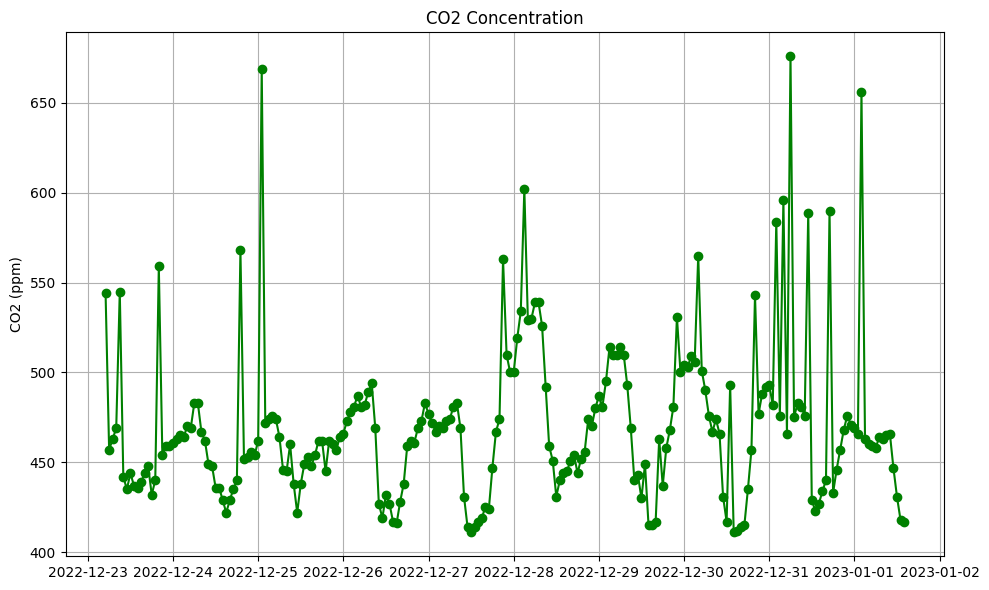

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


fig, axs = plt.subplots(1, 1, figsize=(10, 6))
axs.plot(largest_continuous_data['Time'], largest_continuous_data['CO2'], color='green', marker='o')
axs.set_title('CO2 Concentration')
axs.set_ylabel('CO2 (ppm)')
axs.grid(True)


plt.tight_layout()
plt.show()

In [27]:
largest_continuous_data.shape



(225, 3)

In [28]:
(len(largest_continuous_data)/len(dataframe))*100

3.7859666834931853

Start training models

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,TimeSeriesSplit,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

df = largest_continuous_data.copy()

df['year'] = df['Time'].dt.year
df['month'] = df['Time'].dt.month
df['day'] = df['Time'].dt.day
df['hour'] = df['Time'].dt.hour


X=df[['year','month','day','hour']]
y=df['CO2']

split_point = int(len(df)*0.8)

X_train, X_test = X[:split_point], X[split_point:]
y_train, y_test = y[:split_point], y[split_point:]

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}


results = {}

for name, model in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])

    tscv = TimeSeriesSplit(n_splits=5)
    scores = cross_val_score(pipeline, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')


    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)


    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {
        'Cross-val MSE': -np.mean(scores),
        'Test MSE': mse,
        'Test R2': r2
    }


for name, metrics in results.items():
    print(f"\n{name}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")


best_model = min(results, key=lambda x: results[x]['Test MSE'])
print(f"\nBest model based on Test MSE: {best_model}")

best_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', models[best_model])
])
best_pipeline.fit(X_train, y_train)


sample_date = pd.to_datetime('2023-08-25 14:00:00')
sample_input = pd.DataFrame({
    'year': [sample_date.year],
    'month': [sample_date.month],
    'day': [sample_date.day],
    'hour': [sample_date.hour]
})

prediction = best_pipeline.predict(sample_input)
print(f"\nPredicted CO2 level for {sample_date}: {prediction[0]:.2f}")


Linear Regression:
  Cross-val MSE: 1448.9454
  Test MSE: 3782.5027
  Test R2: -0.0951

Random Forest:
  Cross-val MSE: 1273.0261
  Test MSE: 3280.2529
  Test R2: 0.0503

XGBoost:
  Cross-val MSE: 1589.1661
  Test MSE: 3758.9011
  Test R2: -0.0882

Best model based on Test MSE: Random Forest

Predicted CO2 level for 2023-08-25 14:00:00: 449.48


Arima model

In [30]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error , r2_score,mean_absolute_error
from math import sqrt
from warnings import catch_warnings, filterwarnings
filterwarnings("ignore")


def predict_co2_levels(df, forecast_horizon=10):
    """
    Predict CO2 levels using ARIMA model.

    Parameters:
    df (pandas.DataFrame): DataFrame with 'Time' and 'CO2' columns
    forecast_horizon (int): Number of future time points to predict

    Returns:
    tuple: (predictions, mse, rmse)
    """

    df = df.sort_values('Time')


    df.set_index('Time', inplace=True)


    # You may need to adjust the order (p,d,q) based on your specific data
    model = ARIMA(df['CO2'], order=(5,1,5))
    results = model.fit()

    # Make predictions
    predictions = results.forecast(steps=forecast_horizon)

    # Calculate Mean Squared Error and Root Mean Squared Error
    mse = mean_squared_error(df['CO2'][-forecast_horizon:], predictions)

    #Calculate Mean Absolute Error (MAE)
    mae = mean_absolute_error(df['CO2'][-forecast_horizon:], predictions)

    return predictions, mse,mae

# Example usage:
# Assuming 'df' is your DataFrame with 'Time' and 'CO2' columns
predictions, mse,mae = predict_co2_levels(largest_continuous_data)
# print(f"Predictions: {predictions}")
print(f"Mean Squared Error: {mse}")
rmse = np.sqrt(mse)
print('Root Mean Squared Error (RMSE):', rmse)

#MAE
print(f'Mean Absolute Error (MAE): {mae}')





Mean Squared Error: 596.9943612842419
Root Mean Squared Error (RMSE): 24.43346805683225
Mean Absolute Error (MAE): 19.11752450745397


In [32]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

def predict_co2_levels_for_timerange(df, start_time, end_time):
    """
    Predict CO2 levels for a specific time range using ARIMA model.

    Parameters:
    df (pandas.DataFrame): DataFrame with 'Time' and 'CO2' columns
    start_time (str): Start time in format 'YYYY-MM-DD HH:MM:SS'
    end_time (str): End time in format 'YYYY-MM-DD HH:MM:SS'

    Returns:
    pandas.DataFrame: DataFrame with 'Time' and 'Predicted_CO2' columns
    """

    df = df.sort_values('Time')
    df.set_index('Time', inplace=True)


    model = ARIMA(df['CO2'], order=(5,1,5))
    results = model.fit()


    date_range = pd.date_range(start=start_time, end=end_time, freq='H')
    predictions = results.forecast(steps=len(date_range))
    prediction_df = pd.DataFrame({
        'Time': date_range,
        'Predicted_CO2': predictions
    })

    prediction_df.set_index('Time', inplace=True)
    return prediction_df


start_time = '2022-12-30 18:00:00'
end_time = '2023-01-01 14:00:00'

predicted_co2 = predict_co2_levels_for_timerange(largest_continuous_data, start_time, end_time)
print(predicted_co2)

                     Predicted_CO2
Time                              
2022-12-30 18:00:00     429.473461
2022-12-30 19:00:00     446.973349
2022-12-30 20:00:00     441.097854
2022-12-30 21:00:00     422.196319
2022-12-30 22:00:00     421.499382
2022-12-30 23:00:00     438.177881
2022-12-31 00:00:00     447.027648
2022-12-31 01:00:00     433.429715
2022-12-31 02:00:00     420.790888
2022-12-31 03:00:00     427.345240
2022-12-31 04:00:00     443.390999
2022-12-31 05:00:00     442.366383
2022-12-31 06:00:00     427.913721
2022-12-31 07:00:00     421.737941
2022-12-31 08:00:00     434.302277
2022-12-31 09:00:00     444.045885
2022-12-31 10:00:00     437.264982
2022-12-31 11:00:00     423.952523
2022-12-31 12:00:00     426.257849
2022-12-31 13:00:00     438.674698
2022-12-31 14:00:00     442.749746
2022-12-31 15:00:00     431.327125
2022-12-31 16:00:00     424.003999
2022-12-31 17:00:00     430.729169
2022-12-31 18:00:00     441.657406
2022-12-31 19:00:00     438.485547
2022-12-31 20:00:00 

Prophet Model

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


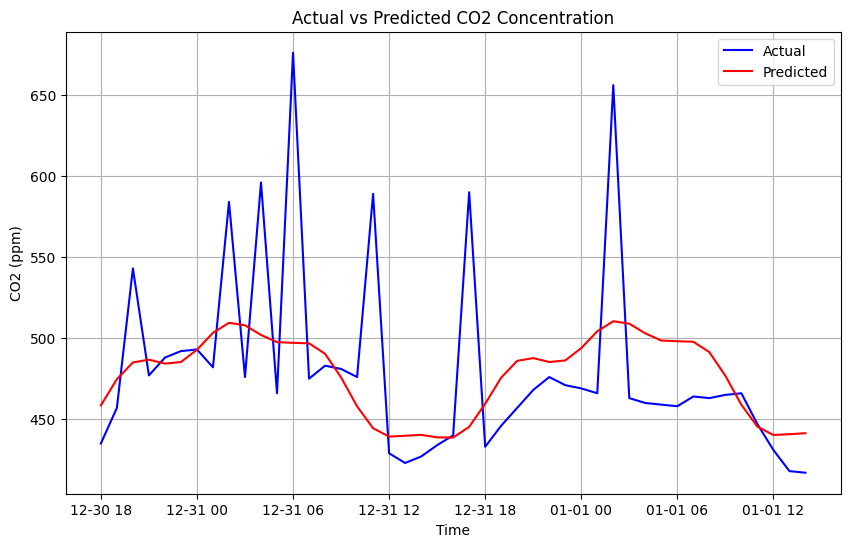

Mean Squared Error (MSE): 2965.030716486654
Mean Absolute Error (MAE): 35.22865639741666
Root Mean Squared Error (RMSE): 54.452095611524946


In [31]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Assuming df is the DataFrame with the data, and it contains the 'Time' and 'CO2' columns

# Prepare the data for the Prophet model
df_prophet = largest_continuous_data[['Time', 'CO2']].rename(columns={'Time': 'ds', 'CO2': 'y'})

# Split the data into training and testing sets
train_size = int(len(df_prophet) * 0.8)
train_data = df_prophet[:train_size]
test_data = df_prophet[train_size:]

# Create and fit the Prophet model with the training data
model = Prophet()
model.fit(train_data)

# Make predictions on the test data
forecast = model.predict(test_data[['ds']])

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(test_data['ds'], test_data['y'], label='Actual', color='blue')
plt.plot(test_data['ds'], forecast['yhat'], label='Predicted', color='red')
plt.title('Actual vs Predicted CO2 Concentration')
plt.xlabel('Time')
plt.ylabel('CO2 (ppm)')
plt.legend()
plt.grid(True)
plt.show()

# Calculate RMSE
mse = mean_squared_error(test_data['y'], forecast['yhat'])
#mae
mae = mean_absolute_error(test_data['y'], forecast['yhat'])
print('Mean Squared Error (MSE):', mse)
rmse = np.sqrt(mse)

print('Mean Absolute Error (MAE):', mae)


print('Root Mean Squared Error (RMSE):', rmse)

Arima VS Prophet model

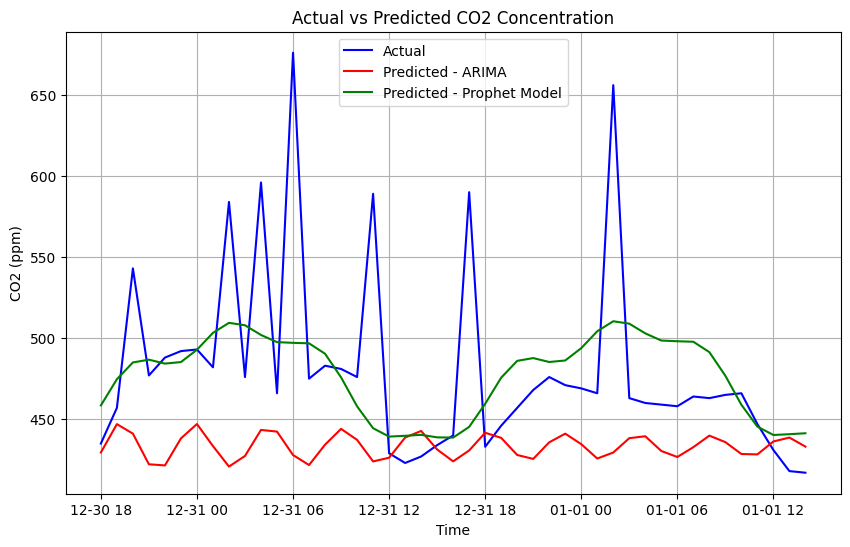

In [33]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(test_data['ds'], test_data['y'], label='Actual', color='blue')
plt.plot(test_data['ds'], predicted_co2['Predicted_CO2'], label='Predicted - ARIMA', color='red')
plt.plot(test_data['ds'], forecast['yhat'], label='Predicted - Prophet Model', color='green')
plt.title('Actual vs Predicted CO2 Concentration')
plt.xlabel('Time')
plt.ylabel('CO2 (ppm)')
plt.legend()
plt.grid(True)
plt.show()


#### More metrics we should consider when choosing a prediction model other than MSE

##### Capturing trend and seasonality: The Prophet model seems to better capture the overall trend and seasonality of the CO2 data, even though its predictions deviate more from the actual values at certain points. This ability to capture underlying patterns is important for many forecasting applications, which MSE alone doesn't reflect.

##### The actual data shows several sharp spikes that neither model predicts accurately. MSE heavily penalizes large errors, so a model that smooths out these spikes (like ARIMA appears to do) might have a lower MSE despite missing important features of the data.

In [34]:
def directional_accuracy(actual, predicted):
    actual_diff = np.diff(actual)
    pred_diff = np.diff(predicted)
    correct_direction = np.sign(actual_diff) == np.sign(pred_diff)
    return np.mean(correct_direction)

da_arima = directional_accuracy(actual=test_data['y'], predicted=predicted_co2['Predicted_CO2'])
da_prophet = directional_accuracy(actual=test_data['y'], predicted=forecast['yhat'])

In [35]:
print(da_arima , da_prophet)

0.4772727272727273 0.5454545454545454


Directional accuracy:
This metric measures how well a model predicts the direction of change, which can be crucial in many business applications. The Prophet model seems to follow the general up and down movements of the actual data more closely, a quality not captured by MSE.

Trend-adjusted MSE: This metric adjusts for overall trends, which can be important when the absolute values are less critical than capturing the pattern of changes.

In [36]:
from scipy import signal

def trend_adjusted_mse(actual, predicted, window_length=24):
    """
    Calculate the Trend-adjusted Mean Squared Error.

    Parameters:
    actual (array-like): The actual observed values
    predicted (array-like): The predicted values
    window_length (int): The window length for the trend estimation (default: 24)

    Returns:
    float: The trend-adjusted MSE
    """
    # Ensure inputs are numpy arrays
    actual = np.array(actual)
    predicted = np.array(predicted)

    # Estimate trend using Savitzky-Golay filter
    trend_actual = signal.savgol_filter(actual, window_length, 3)
    trend_predicted = signal.savgol_filter(predicted, window_length, 3)

    # Detrend the series
    detrended_actual = actual - trend_actual
    detrended_predicted = predicted - trend_predicted

    # Calculate MSE on detrended data
    mse = np.mean((detrended_actual - detrended_predicted)**2)

    return mse

# Usage example:
ta_mse_arima = trend_adjusted_mse(actual=test_data['y'], predicted=predicted_co2['Predicted_CO2'])
ta_mse_prophet = trend_adjusted_mse(actual=test_data['y'], predicted=forecast['yhat'])

In [37]:
print(ta_mse_arima , ta_mse_prophet)

2872.0447530710267 2672.075298881785


Mean Absolute Scaled Error (MASE): MASE compares the model's performance to a naive forecast, providing context that MSE lacks. It's particularly useful for comparing models across different datasets.

In [38]:

def mean_absolute_scaled_error(actual, predicted, seasonal_period=1):
    """
    Calculate the Mean Absolute Scaled Error (MASE).

    Parameters:
    actual (array-like): The actual observed values
    predicted (array-like): The predicted values
    seasonal_period (int): The seasonal period of the time series (default: 1 for non-seasonal data)

    Returns:
    float: The MASE value
    """
    actual = np.array(actual)
    predicted = np.array(predicted)

    # Calculate errors
    errors = np.abs(actual - predicted)

    # Calculate the mean absolute error of the naive forecast
    naive_errors = np.abs(actual[seasonal_period:] - actual[:-seasonal_period])
    mae_naive = np.mean(naive_errors)

    # Calculate MASE
    mase = np.mean(errors) / mae_naive

    return mase

# Usage example:
mase_arima = mean_absolute_scaled_error(actual=test_data['y'], predicted=predicted_co2['Predicted_CO2'])
mase_prophet = mean_absolute_scaled_error(actual=test_data['y'], predicted=forecast['yhat'])

In [39]:
print(mase_arima , mase_prophet)

1.0375990479034818 0.7077903568430743


Mean Absolute Error (MAE): MAE is less sensitive to outliers than MSE, potentially giving a more balanced view of model performance across all data points.

In [40]:


def mean_absolute_error(actual, predicted):
    """
    Calculate the Mean Absolute Error (MAE).

    Parameters:
    actual (array-like): The actual observed values
    predicted (array-like): The predicted values

    Returns:
    float: The MAE value
    """
    actual = np.array(actual)
    predicted = np.array(predicted)

    # Calculate absolute errors
    errors = np.abs(actual - predicted)

    # Calculate mean of absolute errors
    mae = np.mean(errors)

    return mae

# Usage example:
mae_arima = mean_absolute_error(actual=test_data['y'], predicted=predicted_co2['Predicted_CO2'])
mae_prophet = mean_absolute_error(actual=test_data['y'], predicted=forecast['yhat'])

In [41]:
print(mae_arima , mae_prophet)

51.644134429741484 35.22865639741666


Save Prophet model

In [42]:
import joblib

joblib.dump(model , '/content/drive/MyDrive/prophet_model.joblib')


['/content/drive/MyDrive/prophet_model.joblib']